In [1]:
import pandas as pd


df=pd.read_csv("Churn_Modelling.csv")
print(df.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0  


In [2]:
print(df.isnull().sum())

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [3]:
input=df.iloc[:,:-1]
output=df['Exited']


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss=StandardScaler()
input=pd.DataFrame(ss.fit_transform(input),columns=input.columns)
print(input.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583   0.646092   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583  -1.547768   
2    -1.536794  0.293517  1.032908  1.333053       2.527057   0.646092   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737  -1.547768   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583   0.646092   

   IsActiveMember  EstimatedSalary  
0        0.970243         0.021886  
1        0.970243         0.216534  
2       -1.030670         0.240687  
3       -1.030670        -0.108918  
4        0.970243        -0.365276  


In [5]:
# X_train,X_test,y_train,y_test=train_test_split(input,output,test_size=0.2,random_state=42)
#To learn early stoping we tak rando state 10
X_train,X_test,y_train,y_test=train_test_split(input,output,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test)
print(y_test)

(8000, 8)
      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
937      2.063884  0.484225 -0.004426  0.835324      -0.911583  -1.547768   
9355     0.915392  0.102810  1.032908 -1.225848      -0.911583   0.646092   
2293     0.398053  0.579578 -1.733315 -0.299734      -0.911583   0.646092   
192     -1.774770  0.102810 -1.387538 -1.225848       0.807737  -1.547768   
8675     0.656722  1.437761  0.687130  0.795384      -0.911583   0.646092   
...           ...       ...       ...       ...            ...        ...   
5624    -0.346915  0.579578 -1.387538 -1.225848      -0.911583   0.646092   
6005    -0.150326 -1.422847  1.378686 -1.225848       0.807737  -1.547768   
987     -0.843560 -0.469311 -1.733315  1.207697      -0.911583   0.646092   
6152    -1.474714  2.391296 -1.041760 -1.225848      -0.911583   0.646092   
2092     0.046263 -0.087897 -0.695982  2.795323       2.527057  -1.547768   

      IsActiveMember  EstimatedSalary  
937         0.970243     

In [45]:
import tensorflow
from keras.layers import Dense,BatchNormalization,Dropout
from keras.regularizers import L2
from keras.callbacks import EarlyStopping
from keras.models import Sequential

ann=Sequential()

In [56]:
# ann.add(Dense(6,input_dim=8,activation="relu",kernel_regularizer=L2(l2=0.01)))
# ann.add(BatchNormalization())
# ann.add(Dense(4,activation="relu"))
# ann.add(BatchNormalization())
# ann.add(Dense(2,activation="relu"))
# ann.add(BatchNormalization())
# ann.add(Dense(1,activation="sigmoid"))

# ann.add(Dense(6,input_dim=8,activation="relu",kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5))
# ann.add(Dense(4,activation="relu"))
# ann.add(Dropout(0.5))
# ann.add(Dense(2,activation="relu"))
# ann.add(Dropout(0.5))
# ann.add(Dense(1,activation="sigmoid"))

ann.add(Dense(6,input_dim=8,activation="relu",kernel_regularizer=L2(l2=0.01)))

ann.add(Dense(4,activation="relu"))

ann.add(Dense(2,activation="relu"))

ann.add(Dense(1,activation="sigmoid"))




c:\Users\Vansh Parmar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

ann.fit(X_train,y_train,batch_size=100,epochs=50,validation_data=(X_test,y_test),callbacks=EarlyStopping())
#batch_size depends on x_train size

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7981 - loss: 0.7112 - val_accuracy: 0.7890 - val_loss: 0.6962
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7981 - loss: 0.6821 - val_accuracy: 0.7890 - val_loss: 0.6704
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7981 - loss: 0.6575 - val_accuracy: 0.7890 - val_loss: 0.6484
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7981 - loss: 0.6362 - val_accuracy: 0.7890 - val_loss: 0.6290
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7981 - loss: 0.6175 - val_accuracy: 0.7890 - val_loss: 0.6123
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7981 - loss: 0.6013 - val_accuracy: 0.7890 - val_loss: 0.5978
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7981 - loss: 0.5872 - val_accuracy: 0.7890 - val_loss: 0.5852
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7981 - loss: 0.5749 - val_accuracy: 0.7890 - val_loss

In [58]:
#Gives training data accuray history to find testing data accuray add validation_data in ann.fit
train_accuracy=ann.history.history['accuracy']
test_accuracy=ann.history.history['val_accuracy']

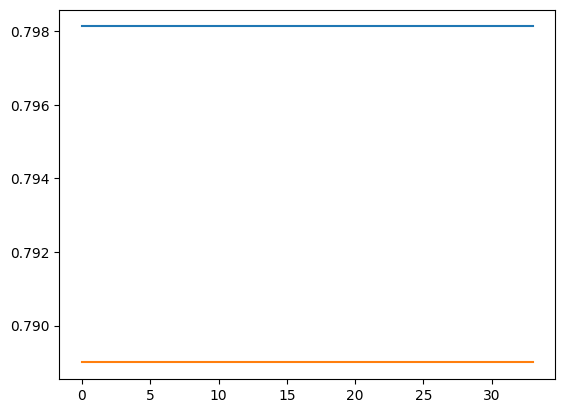

In [59]:
import matplotlib.pyplot as plt
plt.plot([ i for i in range(0,34)],train_accuracy)
plt.plot([ i for i in range(0,34)],test_accuracy)
plt.show()

In [60]:
res=ann.predict(X_test)
res1=ann.predict(X_train)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [61]:
res_data=[]
for i in res:
    if i[0]>0.5:
        res_data.append(1)
    else :
        res_data.append(0)

print(res_data)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [62]:
res1_data=[]
for i in res1:
    if i[0]>0.5:
        res1_data.append(1)
    else :
        res1_data.append(0)

print(res1_data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,res_data)*100

78.9

In [64]:
accuracy_score(y_train,res1_data)*100




79.8125

In [65]:
import numpy as np
predict=ann.predict(np.array([[ 0.822271 , 0.770285 ,0.687130,-1.225848,-0.911583,0.646092 ,-1.030670,-1.160142]]))
predict_data=[]
for i in predict:
    if i[0]>0.5:
        predict_data.append(1)
    else :
        predict_data.append(0)

print(predict_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[0]
